In [7]:
# for colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [8]:
%cd /content/drive/Othercomputers/xiaoxin/Mixed-Effect-Model-Numerical-Algorithm

/content/drive/Othercomputers/xiaoxin/Mixed-Effect-Model-Numerical-Algorithm


In [14]:
from lmm_em import *
import time
# load data
data_name = 'XYZ_MoM'
data = pd.read_table('data/'+data_name+'.txt', sep='\t', header=0).values
y = data[:, 0].reshape(-1, 1)
Z = data[:, 1:31]
X = data[:, 31:]

start_time = time.time()
# run EM algorithm
likelihood_list, omega_list, sigma_beta2_list, sigma_e2_list, beta_post_mean = lmm_em(y, X, Z, max_iter=50)
end_time = time.time()
print('Run time: ', end_time - start_time, 's')

# run EM algorithm with limited data
# MAX_LENGTH = 200
# MAX_X_LENGTH = 100
# likelihood_list, omega_list, sigma_beta2_list, sigma_e2_list, beta_post_mean = lmm_em(
#     y[:MAX_LENGTH], X[:MAX_LENGTH, :MAX_X_LENGTH], Z[:MAX_LENGTH, :])

EM algorithm starts
iter: 5, likelihood: -5.5883e+03
iter: 10, likelihood: -5.5022e+03
iter: 15, likelihood: -5.4583e+03
iter: 20, likelihood: -5.4367e+03
iter: 25, likelihood: -5.4252e+03
iter: 30, likelihood: -5.4174e+03
iter: 35, likelihood: -5.4095e+03
iter: 40, likelihood: -5.3997e+03
iter: 45, likelihood: -5.3868e+03
iter: 50, likelihood: -5.3702e+03
EM algorithm does not converge within 50 iterations
sigma_beta^2 = 7.9492e-01
sigma_e^2 = 1.7544e-01
beta_post_mean = -6.7427e-04
omega_mean = -6.6511e-03
resident = 6.0889e-03
Run time:  1603.435979604721 s


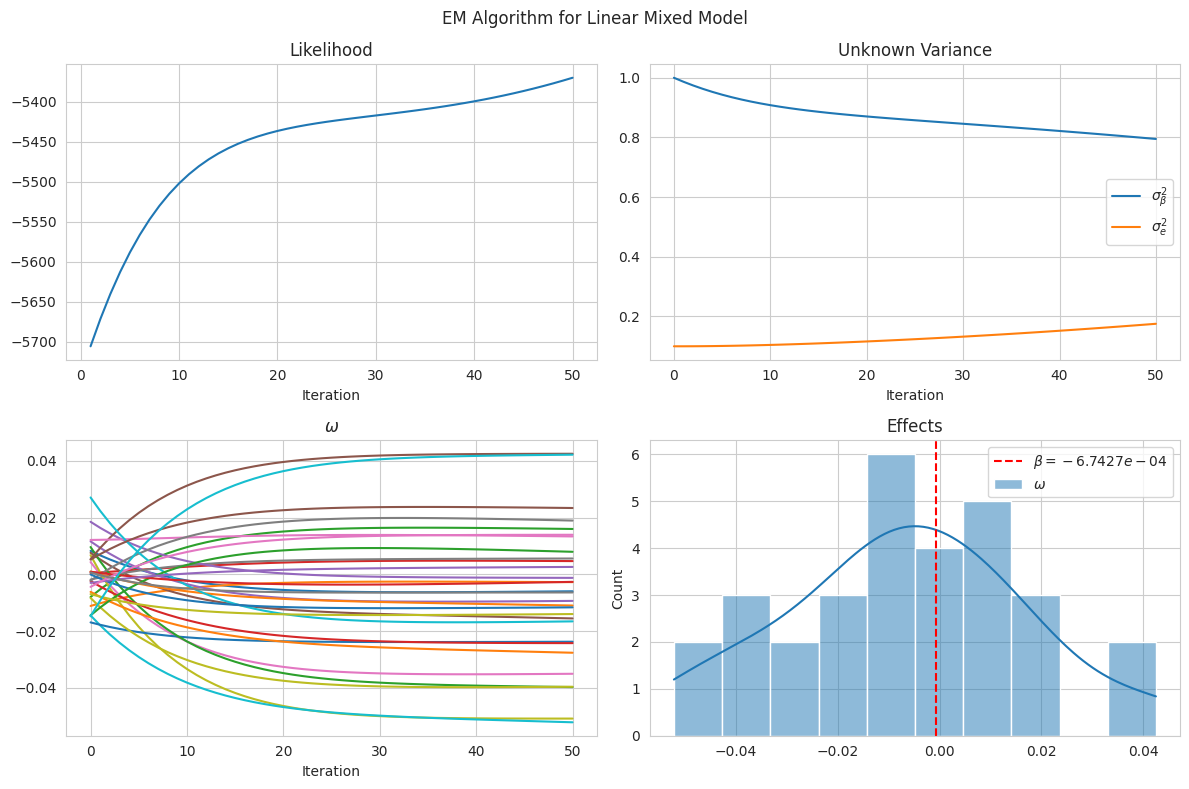

In [15]:
# subplot
fig, axes = plt.subplots(2, 2, figsize=(12, 8))
# omit the first point
axes[0, 0].plot(range(1, len(likelihood_list)), likelihood_list[1:])
axes[0, 0].set_xlabel('Iteration')
axes[0, 0].set_title('Likelihood')

axes[0, 1].plot(sigma_beta2_list, label=r'$\sigma_\beta^2$')
axes[0, 1].plot(sigma_e2_list, label=r'$\sigma_e^2$')
axes[0, 1].set_xlabel('Iteration')
axes[0, 1].set_title('Unknown Variance')
axes[0, 1].legend()

axes[1, 0].plot(omega_list.T)
axes[1, 0].set_xlabel('Iteration')
axes[1, 0].set_title(r'$\omega$')

# hist
sns.histplot(omega_list[:, -1], kde=True, bins=10, ax=axes[1, 1], label=r'$\omega$')
axes[1, 1].axvline(beta_post_mean,
            color='r',
            linestyle='--',
            label=rf'$\beta={beta_post_mean:.4e}$')
axes[1, 1].set_title('Effects')
axes[1, 1].legend()

plt.suptitle('EM Algorithm for Linear Mixed Model')
plt.tight_layout()
plt.savefig('img/lmm_em'+data_name+'.png')
plt.show()